<a href="https://colab.research.google.com/github/MoonHyeonju/project/blob/main/Analysis_of_the_deposit_subscription_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
df = pd.read_csv('/content/sample_data/bank_additional_clean_team_version.csv')

yes_cnt = (df['y'] == 'yes').sum()
print("전체 가입자 수:", yes_cnt)
# 연령대 분류
def age_group(age):
  if age < 20:
    return '10대'
  elif age < 30:
    return '20대'
  elif age < 40:
    return '30대'
  elif age < 50:
    return '40대'
  elif age < 60:
    return '50대'
  else:
    return '60대 이상'
df['age_group'] = df['age'].apply(age_group)

전체 가입자 수: 4640


age_group
10대         34
20대        888
30대       1715
40대        834
50대        697
60대 이상     472
Name: count, dtype: int64


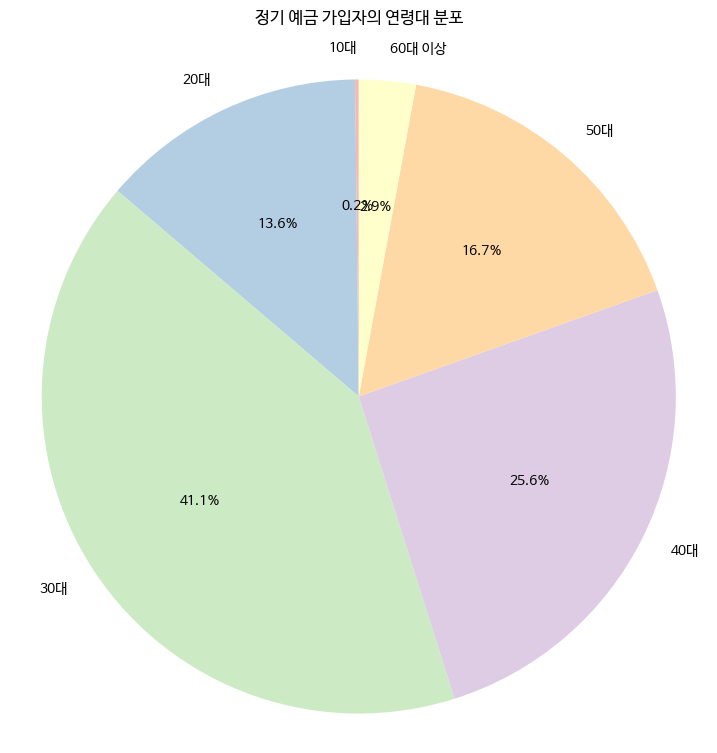

In [4]:
plt.rc('font', family='NanumBarunGothic')
# 전체 가입자의 연령대 분포 분석
y_yes = df[df['y'] == 'yes']['age_group'].value_counts().sort_index()
print(y_yes)

age_cnt = df['age_group'].value_counts().reindex(['10대', '20대', '30대', '40대', '50대', '60대 이상'])

# 시각화
plt.figure(figsize=(9,9))
plt.title('정기 예금 가입자의 연령대 분포', pad=20)
plt.pie(age_cnt,labels=age_cnt.index, autopct='%1.1f%%',startangle=90, colors=plt.cm.Pastel1.colors)
plt.axis('equal')
plt.show()

주택대출을 받은 고객들의 수: 21576
주택대출을 받은 고객들 중 정기 예금 가입한 고객들의 수: 2507
주택대출을 받은 고객들 중 정기 예금 가입한 고객들의 비율: 11.62%


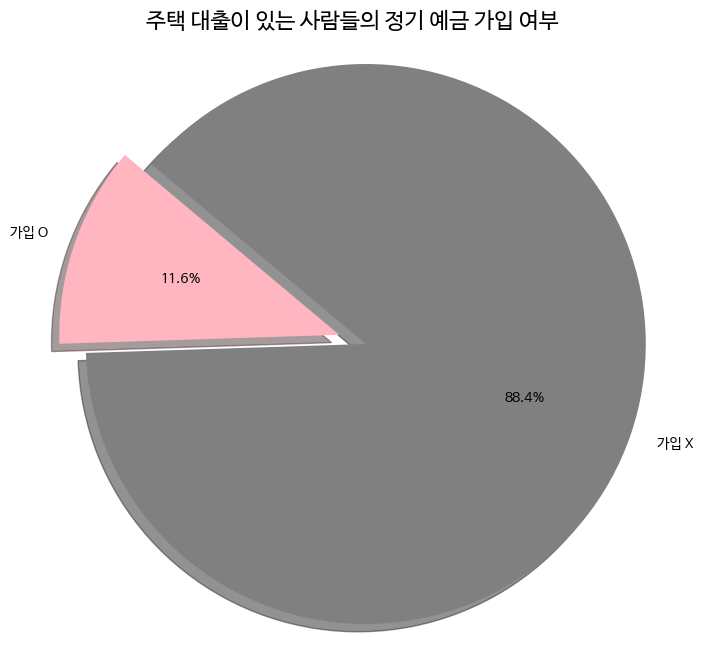

In [8]:
# 주택대출을 받은 고객
housing_yes = df[df['housing'] == 'yes']

# 주택대출을 받은 고객 중 정기 예금에 가입한 고객
housing_and_y = housing_yes[housing_yes['y'] == 'yes'].shape[0]

# 주택대출을 받은 고객들의 수
total_h = housing_yes.shape[0]

# 주택대출을 받은 고객들 중 정기 예금 가입한 고객의 비율
proprotion_y = housing_and_y / total_h

print(f"주택대출을 받은 고객들의 수: {total_h}")
print(f"주택대출을 받은 고객들 중 정기 예금 가입한 고객들의 수: {housing_and_y}")
print(f"주택대출을 받은 고객들 중 정기 예금 가입한 고객들의 비율: {proprotion_y:.2%}")

# 시각화(파이 차트)
labels = ['가입 O', '가입 X']
sizes = [housing_and_y, total_h - housing_and_y]
colors = ['lightpink', 'gray']
explode = (0.1, 0)

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(8, 8))
plt.title('주택 대출이 있는 사람들의 정기 예금 가입 여부', fontsize=16)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()



개인대출을 받은 고객들의 수: 6248
개인대출을 받은 고객들 중 정기 예금 가입한 고객들의 수: 683
개인대출을 받은 고객들 중 정기 예금 가입한 고객들의 비율: 10.93%


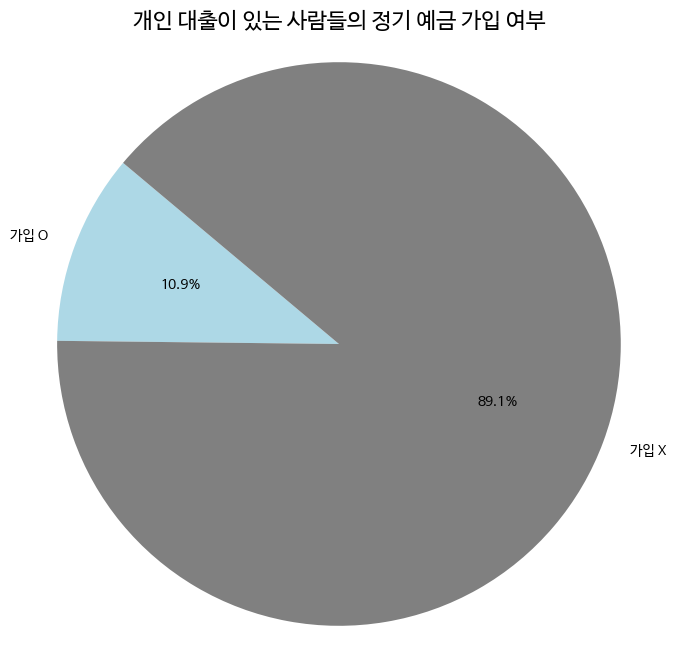

In [13]:
# 개인대출을 받은 고객
loan_yes = df[df['loan'] == 'yes']

# 개인대출을 받은 고객 중 정기 예금에 가입한 고객
loan_and_y = loan_yes[loan_yes['y'] == 'yes'].shape[0]

# 개인대출을 받은 고객들의 수
total_l = loan_yes.shape[0]

# 개인대출을 받은 고객들 중 정기 예금 가입한 고객의 비율
proprotion_y_loan = loan_and_y / total_l

print(f"개인대출을 받은 고객들의 수: {total_l}")
print(f"개인대출을 받은 고객들 중 정기 예금 가입한 고객들의 수: {loan_and_y}")
print(f"개인대출을 받은 고객들 중 정기 예금 가입한 고객들의 비율: {proprotion_y_loan:.2%}")

# 시각화(파이 차트)
labels = ['가입 O', '가입 X']
sizes = [loan_and_y, total_l - loan_and_y]
colors = ['lightblue', 'gray']
explode = (0, 0)

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(8, 8))
plt.title('개인 대출이 있는 사람들의 정기 예금 가입 여부', fontsize=16)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [22]:
# 예금 가입한 고객
sub = df[df['y'] == 'yes']

# 직업별로 분류
job = {
    'admin.': '관리직',
    'blue-collar': '블루칼라',
    'technician': '기술자',
    'services': '서비스직',
    'management': '경영자',
    'retired': '은퇴자',
    'entrepreneur': '사업가',
    'self-employed': '자영업자',
    'unemployed': '무직',
    'housemaid': '가정주부',
    'student': '학생',
    'unknown': '알 수 없음'
}

sub['job'] = sub['job'].map(job)
job_cnt = sub['job'].value_counts()

print(job_cnt)

job
관리직     1352
기술자      730
블루칼라     638
은퇴자      434
경영자      328
서비스직     323
학생       275
자영업자     149
무직       144
사업가      124
가정주부     106
Name: count, dtype: int64


/tmp/ipython-input-4103181679.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['job'] = sub['job'].map(job)


/tmp/ipython-input-2192971732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_cnt.index, y=job_cnt.values, palette='viridis')


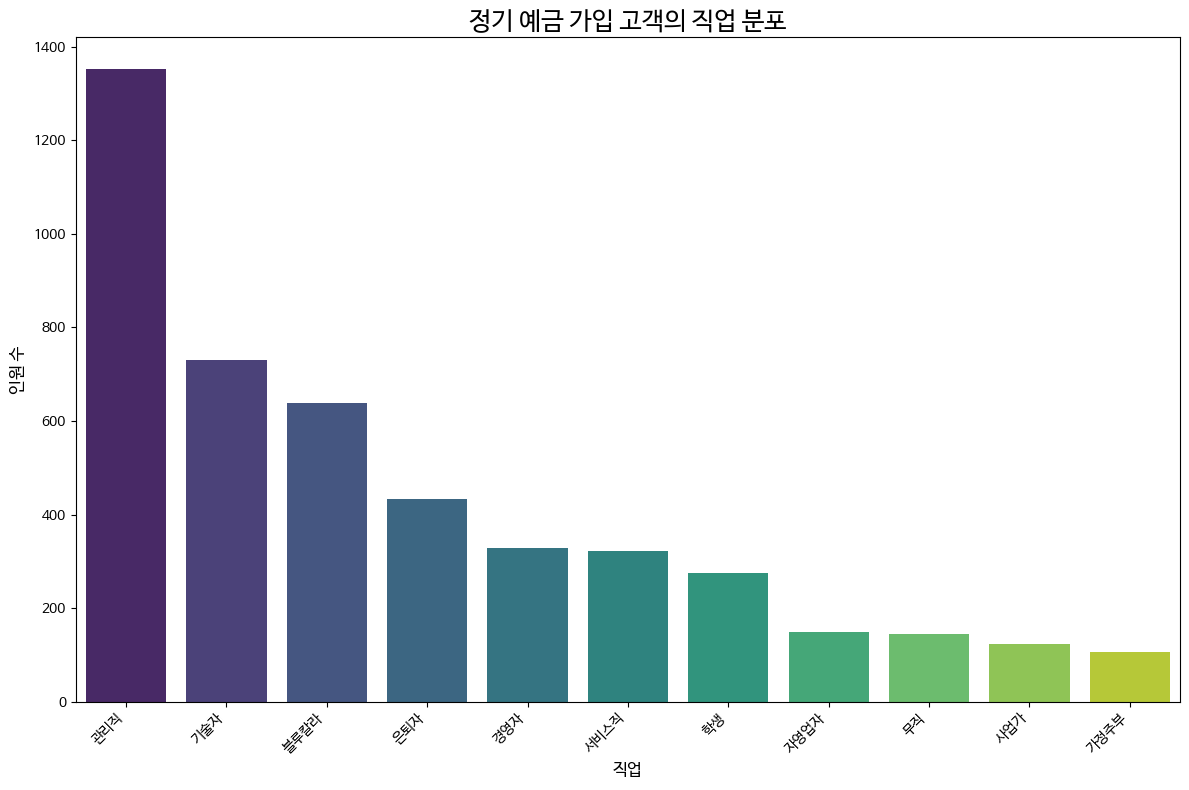

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x=job_cnt.index, y=job_cnt.values, palette='viridis')
plt.title("정기 예금 가입 고객의 직업 분포", fontsize=18)
plt.xlabel("직업", fontsize=12)
plt.ylabel("인원 수", fontsize=12)
plt.xticks(rotation=45, ha='right') # x축 라벨을 45도 회전
plt.tight_layout() # 그래프 요소들이 겹치지 않게 자동 조정
plt.show()